In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [4]:
# Reading crypto data
crypto_prices = Path("/Users/davidkratzer/documents/fintech/yFinance_stock_data/crypto_data.csv")
crypto_prices = pd.read_csv(crypto_prices, index_col="Date", parse_dates=True)
crypto_prices.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOT-USD,ETH-USD,LINK-USD,LTC-USD,SOL-USD,XRP-USD
Date,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,314.248993,NaN,NaN,NaN,2.69905,NaN,NaN
2015-01-02,NaN,NaN,NaN,315.032013,NaN,NaN,NaN,2.66736,NaN,NaN
2015-01-03,NaN,NaN,NaN,281.082001,NaN,NaN,NaN,2.13316,NaN,NaN
2015-01-04,NaN,NaN,NaN,264.195007,NaN,NaN,NaN,1.95668,NaN,NaN
2015-01-05,NaN,NaN,NaN,274.473999,NaN,NaN,NaN,2.08218,NaN,NaN


In [15]:
# Count nulls
crypto_prices.isnull().sum()

ADA-USD     1043
BCH-USD     1043
BNB-USD     1043
BTC-USD        0
DOT-USD     2058
ETH-USD     1043
LINK-USD    1043
LTC-USD        0
SOL-USD     1926
XRP-USD     1043
dtype: int64

In [5]:
# DROP NULLS
#crypto_prices.dropna(inplace=True)
#crypto_prices.isnull().sum()

In [6]:
# Reading stock data
stock_prices = Path("/Users/davidkratzer/documents/fintech/yFinance_stock_data/stock_data.csv")
stock_prices = pd.read_csv(stock_prices, index_col="Date", parse_dates=True)
stock_prices.head()

,AAPL,AMZN,DIS,GOOG,META,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,,
2015-01-02,24.435268,15.4260,87.092422,26.168653,78.366852,40.378067,4.832578,174.265381,14.620667
2015-01-05,23.746887,15.1095,85.819702,25.623152,77.108192,40.006767,4.750957,171.118149,14.006000
2015-01-06,23.749123,14.7645,85.364494,25.029282,76.069290,39.419575,4.606914,169.506409,14.085333
2015-01-07,24.082138,14.9210,86.237762,24.986401,76.069290,39.920399,4.594910,171.618683,14.063333
2015-01-08,25.007427,15.0230,87.129578,25.065184,78.097137,41.094788,4.767761,174.664047,14.041333


In [7]:
# Count nulls
stock_prices.isnull().sum()

AAPL    0
AMZN    0
DIS     0
GOOG    0
META    0
MSFT    0
NVDA    0
SPY     0
TSLA    0
dtype: int64

In [19]:
# No need to drop nulls
#stock_prices.dropna(inplace=True)
#stock_prices

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 data
sp500_prices = Path("/Users/davidkratzer/documents/fintech/yFinance_stock_data/sp500_data.csv")
sp500_prices = pd.read_csv(sp500_prices, index_col="Date", parse_dates=True)
sp500_prices.head()

,IVV,RSP,SH,SPLG,SPY,SPYG,VOO,VOOG,VOOV
Date,,,,,,,,,
2015-01-02,175.108322,68.340973,39.727833,20.437231,174.265335,21.464699,159.193771,89.591492,73.126892
2015-01-05,172.033539,66.983192,40.383595,20.035460,171.118164,21.135813,156.396896,88.282951,71.700394
2015-01-06,170.483383,66.257355,40.820770,19.794403,169.506363,20.971373,154.859024,87.503189,70.962753
2015-01-07,172.592621,67.051521,40.274307,20.120045,171.618652,21.224709,156.793991,88.641457,71.578758
2015-01-08,175.675827,68.229965,39.582115,20.487982,174.664001,21.620268,159.548676,90.317497,72.826981


In [9]:
# Count nulls
sp500_prices.isnull().sum()

IVV     0
RSP     0
SH      0
SPLG    0
SPY     0
SPYG    0
VOO     0
VOOG    0
VOOV    0
dtype: int64

In [10]:
# Combine data sets
combined_prices = pd.concat([crypto_prices, stock_prices, sp500_prices],axis="columns")

In [11]:
# Check combined data
combined_prices

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOT-USD,ETH-USD,LINK-USD,LTC-USD,SOL-USD,XRP-USD,...,TSLA,IVV,RSP,SH,SPLG,SPY,SPYG,VOO,VOOG,VOOV
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,314.248993,NaN,NaN,NaN,2.699050,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,315.032013,NaN,NaN,NaN,2.667360,NaN,NaN,...,14.620667,175.108322,68.340973,39.727833,20.437231,174.265335,21.464699,159.193771,89.591492,73.126892
2015-01-03,NaN,NaN,NaN,281.082001,NaN,NaN,NaN,2.133160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,264.195007,NaN,NaN,NaN,1.956680,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,274.473999,NaN,NaN,NaN,2.082180,NaN,NaN,...,14.006000,172.033539,66.983192,40.383595,20.035460,171.118164,21.135813,156.396896,88.282951,71.700394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,0.440812,434.157166,578.488037,60636.855469,6.422238,3012.286865,13.133521,79.495316,126.962708,0.500065,...,183.279999,504.440002,161.199997,12.430000,59.060001,501.980011,70.320000,461.429993,293.019989,172.889999
2024-05-01,0.449866,424.038635,561.408203,58254.011719,6.883043,2969.784668,13.344388,80.095863,134.627975,0.517000,...,179.990005,502.859985,160.649994,12.490000,58.840000,500.350006,70.040001,459.929993,291.369995,172.389999
2024-05-02,0.458282,429.969849,560.526733,59123.433594,7.285116,2988.168457,13.595815,80.122772,137.814484,0.518329,...,180.009995,507.459991,161.639999,12.380000,59.410000,505.029999,70.889999,464.220001,295.209991,173.389999


<Axes: xlabel='Date'>

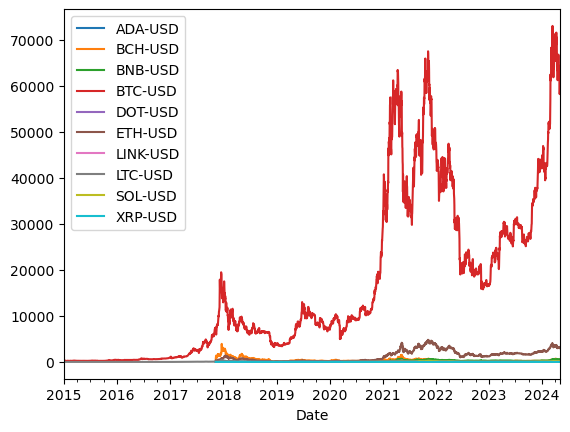

In [12]:
# Plot Crypto Prices
crypto_prices.plot()

<Axes: xlabel='Date'>

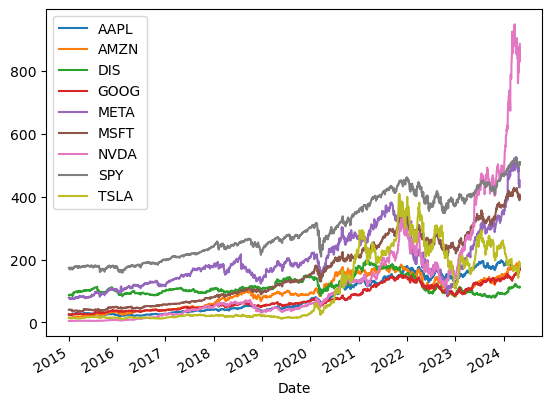

In [13]:
# Plot Stock Prices
stock_prices.plot()

<Axes: xlabel='Date'>

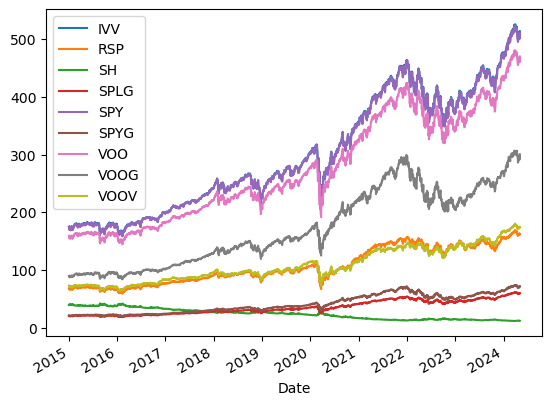

In [14]:
# Plot SP500 Prices
sp500_prices.plot()

<Axes: xlabel='Date'>

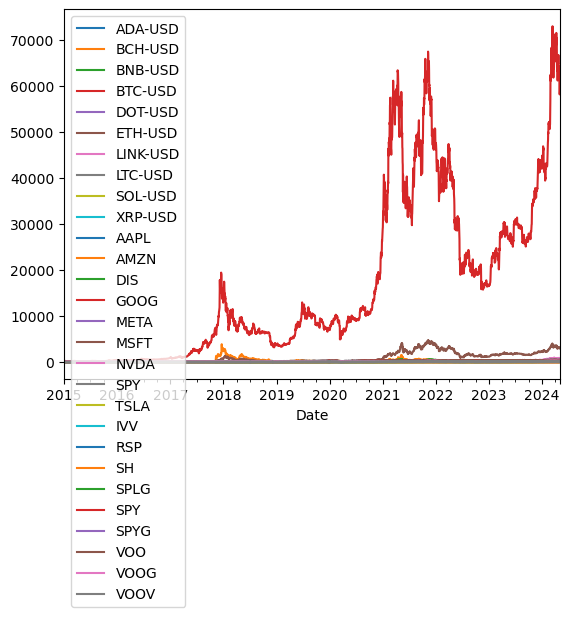

In [15]:
# Plot All Prices
combined_prices.plot()

In [ ]:
# Plots of prices is not very valuable because of BTC price

NameError: name 'plt' is not defined

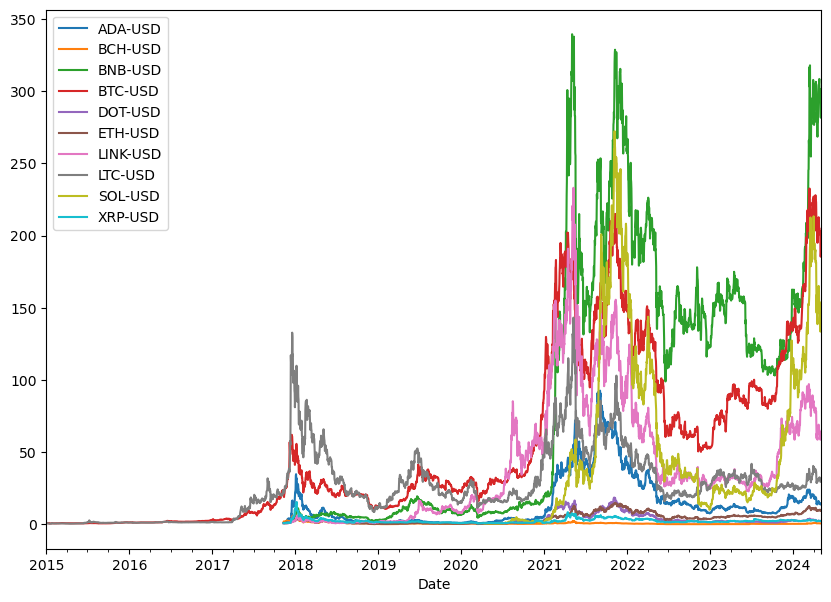

In [16]:
# Plot the crypto returns
((crypto_prices.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

NameError: name 'plt' is not defined

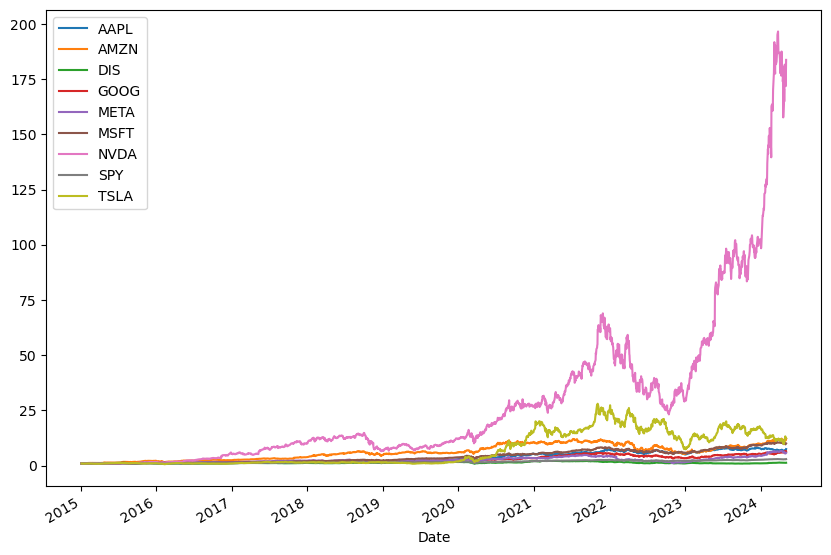

In [17]:
# Plot the stock returns
((stock_prices.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

NameError: name 'plt' is not defined

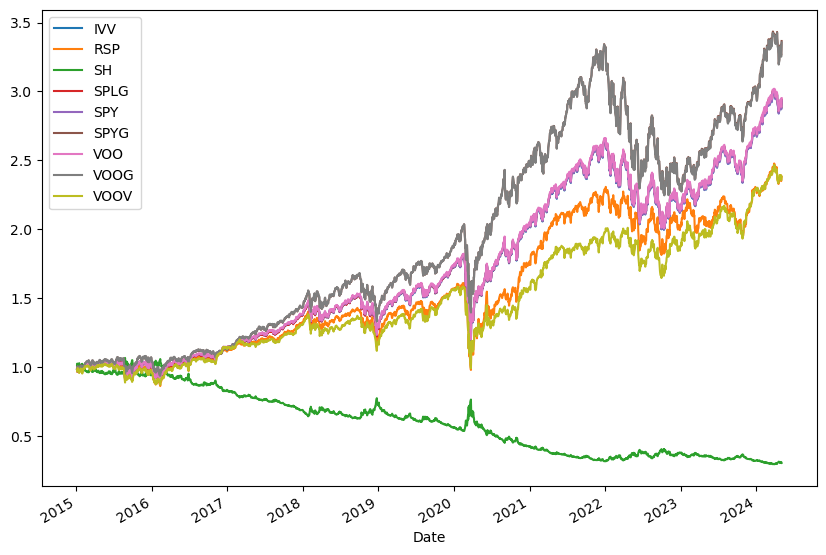

In [18]:
# Plot the sp500 returns
((sp500_prices.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

/var/folders/_3/lcz201ts0lnd2525vhzwj1r80000gn/T/ipykernel_16951/1061747901.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ((combined_prices.pct_change()+1).cumprod()).plot(figsize=(10, 7))


NameError: name 'plt' is not defined

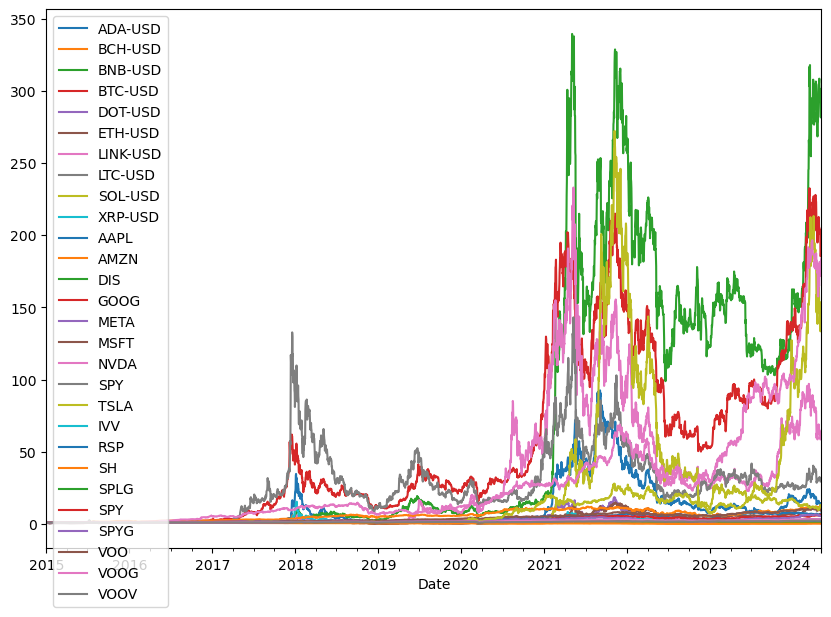

In [19]:

# Plot all the returns
((combined_prices.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()